In [54]:
import tensorflow as tf

In [55]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
tf.test.gpu_device_name()

2023-01-22 19:41:35.214443: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-22 19:41:35.239844: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-01-22 19:41:35.239872: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: martika-Modern-15-A10RBS
2023-01-22 19:41:35.239878: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: martika-Modern-15-A10RBS
2023-01-22 19:41:35.239945: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.161.3
2023-01-22 19:41:35.239964: I tensorflow/compiler/xla/stre

''

In [133]:
import string 
import pickle
from sklearn.model_selection import train_test_split

In [134]:
from nltk.translate.bleu_score import corpus_bleu

In [57]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import string
import os
from PIL import Image
import glob
from pickle import dump, load
from time import time
from tensorflow import keras 
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import ELU, PReLU, LeakyReLU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import add
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras import Input, layers
from tensorflow.keras import optimizers
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical




In [58]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

Wczytywanie numer zdjęcia - odpowiadające podpisy

In [59]:
filename = "archive/captions.txt"
file = open(filename, 'r')
doc = file.read()

In [60]:
descriptions = dict()
for line in doc.split('\n'):
    # split line by white space
    tokens = line.split(',')
    
    # take the first token as image id, the rest as description
    image_id, image_desc = tokens[0], tokens[1:]
    
    # extract filename from image id
    image_id = image_id.split('.')[0]
    
    # convert description tokens back to string
    image_desc = ' '.join(image_desc)
    if image_id not in descriptions:
        descriptions[image_id] = list()
    descriptions[image_id].append(image_desc)

In [61]:
descriptions

{'image': ['caption'],
 '1000268201_693b08cb0e': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A girl going into a wooden building .',
  'A little girl climbing into a wooden playhouse .',
  'A little girl climbing the stairs to her playhouse .',
  'A little girl in a pink dress going into a wooden cabin .'],
 '1001773457_577c3a7d70': ['A black dog and a spotted dog are fighting',
  'A black dog and a tri-colored dog playing with each other on the road .',
  'A black dog and a white dog with brown spots are staring at each other in the street .',
  'Two dogs of different breeds looking at each other on the road .',
  'Two dogs on pavement moving toward each other .'],
 '1002674143_1b742ab4b8': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on 

tworzenie listy podpisów

In [6]:
# prepare translation table for removing punctuation
table = str.maketrans('', '', string.punctuation)
for key, desc_list in descriptions.items():
    for i in range(len(desc_list)):
        desc = desc_list[i]
        # tokenize
        desc = desc.split()
        # convert to lower case
        desc = [word.lower() for word in desc]
        # remove punctuation from each token
        desc = [w.translate(table) for w in desc]
        # remove hanging 's' and 'a'
        desc = [word for word in desc if len(word)>1]
        # remove tokens with numbers in them
        desc = [word for word in desc if word.isalpha()]
        # store as string
        desc_list[i] =  ' '.join(desc)

In [7]:
descriptions.pop('image')

['caption']

In [8]:
descriptions.keys()

dict_keys(['1000268201_693b08cb0e', '1001773457_577c3a7d70', '1002674143_1b742ab4b8', '1003163366_44323f5815', '1007129816_e794419615', '1007320043_627395c3d8', '1009434119_febe49276a', '1012212859_01547e3f17', '1015118661_980735411b', '1015584366_dfcec3c85a', '101654506_8eb26cfb60', '101669240_b2d3e7f17b', '1016887272_03199f49c4', '1019077836_6fc9b15408', '1019604187_d087bf9a5f', '1020651753_06077ec457', '1022454332_6af2c1449a', '1022454428_b6b660a67b', '1022975728_75515238d8', '102351840_323e3de834', '1024138940_f1fefbdce1', '102455176_5f8ead62d5', '1026685415_0431cbf574', '1028205764_7e8df9a2ea', '1030985833_b0902ea560', '103106960_e8a41d64f8', '103195344_5d2dc613a3', '103205630_682ca7285b', '1032122270_ea6f0beedb', '1032460886_4a598ed535', '1034276567_49bb87c51c', '104136873_5b5d41be75', '1042020065_fb3d3ba5ba', '1042590306_95dea0916c', '1045521051_108ebc19be', '1048710776_bb5b0a5c7c', '1052358063_eae6744153', '105342180_4d4a40b47f', '1053804096_ad278b25f1', '1055623002_8195a43714'

In [9]:
desc_list

['']

stworzenie słownika

In [62]:
vocabulary = set()
for key in descriptions.keys():
    [vocabulary.update(d.split()) for d in descriptions[key]]
print('Original Vocabulary Size: %d' % len(vocabulary))

Original Vocabulary Size: 9862


zapisywanie słownika

In [29]:
with open("descriptions.txt",'wb') as f:
   pickle.dump(vocabulary, f)

wczytywanie słównika <- to odpalić jeśli już rozwiązanie jest gbotowe <=========

In [63]:
##To read it again from file
with open("descriptions.txt",'rb') as f:
   vocabulary = pickle.load(f)

dzielenie słów na uczące i testowe

In [13]:
train_list = list(descriptions.keys())
train_im, test_im = train_test_split(train_list[1:], test_size = 0.2)

zapisywanie listy zdjęć do trenowani ai testowania

In [14]:
with open("train_im_list.pkl", "wb") as encoded_pickle:
    pickle.dump(train_im, encoded_pickle)
with open("test_im_list.pkl", "wb") as encoded_pickle:
    pickle.dump(test_im, encoded_pickle)

wczytywanie listy zdjęć do trenowania i testowania <==================

In [64]:
train_im = load(open("train_im_list.pkl", "rb"))
print('Photos: train images=%d' % len(train_im))
test_im = load(open("test_im_list.pkl", "rb"))
print('Photos: test images=%d' % len(test_im))

Photos: train images=6472
Photos: test images=1619


czyszczenie słownika i dodawanie start i end

In [112]:
train_descriptions = { your_key: descriptions[your_key] for your_key in train_im }

In [138]:
test_descriptions = { your_key: descriptions[your_key] for your_key in test_im }

In [114]:
train_descriptions = {key: ['startseq ' + i + ' endseq' for i in val] for key, val in train_descriptions.items()}

In [115]:
train_descriptions['181103691_fb2f956abd'][0].split()

['startseq',
 'A',
 'group',
 'of',
 'children',
 'play',
 'in',
 'the',
 'street',
 'where',
 'water',
 'is',
 'sprayed',
 '.',
 'endseq']

In [116]:
# Create a list of all the training captions
all_train_captions = []
for key, val in train_descriptions.items():
    for cap in val:
        all_train_captions.append(cap)

# Consider only words which occur at least 10 times in the corpus
word_count_threshold = 10
word_counts = {}
nsents = 0
for sent in all_train_captions:
    nsents += 1
    for w in sent.split(' '):
        word_counts[w] = word_counts.get(w, 0) + 1

vocab = [w for w in word_counts if word_counts[w] >= word_count_threshold]

print('preprocessed words %d ' % len(vocab))

preprocessed words 1798 


cechy ze zdjęć za pomocą sieci inception

In [70]:
model = InceptionV3(weights='imagenet')
# Remove the last layer (output softmax layer) from the inception v3
model_new = Model(model.input, model.layers[-2].output)
model = InceptionV3(weights='imagenet')

In [21]:
images = "archive/Images/"
# Create a list of all image names in the directory
img = glob.glob(images + '*.jpg')

In [22]:
# Create a list of all the training images with their full path names
train_img = []

for i in img: # img is list of full path names of all images
    if i[len(images):-4] in train_im: # Check if the image belongs to training set
        train_img.append(i) # Add it to the list of train images

In [23]:
# Create a list of all the test images with their full path names
test_img = []

for i in img: # img is list of full path names of all images
    if i[len(images):-4] in test_im: # Check if the image belongs to test set
        test_img.append(i) # Add it to the list of test images

In [117]:
# convert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc
def max_length(descriptions):
    lines = to_lines(descriptions)
    return max(len(d.split()) for d in lines)

# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

Description Length: 39


In [118]:
#słowa na cyferki i cyferki na słowa
ixtoword = {}
wordtoix = {}

ix = 1
for w in vocab:
    wordtoix[w] = ix
    ixtoword[ix] = w
    ix += 1

In [120]:
vocab_size = len(ixtoword) + 1 # one for appended 0's
vocab_size

1799

In [162]:
vocab_size

1799

In [121]:
vocab = load(open("vocab.pkl", "rb"))

In [245]:
vocab

['group',
 'of',
 'boys',
 'in',
 'desert',
 'playing',
 'with',
 'ball',
 'young',
 'men',
 'are',
 'about',
 'to',
 'play',
 'soccer',
 'on',
 'sandy',
 'plain',
 'the',
 'dirt',
 'some',
 'african',
 'kids',
 'small',
 'boy',
 'looks',
 'at',
 'camera',
 'while',
 'other',
 'behind',
 'him',
 'people',
 'out',
 'middle',
 'ocean',
 'race',
 'boats',
 'and',
 'all',
 'wearing',
 'red',
 'helmets',
 'life',
 'jackets',
 'four',
 'racing',
 'across',
 'sea',
 'several',
 'speed',
 'dressed',
 'them',
 'races',
 'each',
 'woman',
 'white',
 'glasses',
 'sits',
 'room',
 'wears',
 'long',
 'sitting',
 'down',
 'her',
 'hand',
 'under',
 'right',
 'is',
 'resting',
 'head',
 'crowded',
 'area',
 'dog',
 'large',
 'carrying',
 'stick',
 'its',
 'mouth',
 'run',
 'outside',
 'smaller',
 'trying',
 'get',
 'hold',
 'that',
 'tricolored',
 'has',
 'little',
 'bite',
 'onto',
 'black',
 'two',
 'dogs',
 'brown',
 'for',
 'standing',
 'water',
 'collar',
 'stream',
 'tongue',
 'stands',
 'his',

In [74]:
def preprocess(image_path):
    # Convert all the images to size 299x299 as expected by the inception v3 model
    img = load_img(image_path, target_size=(299, 299))
    # Convert PIL image to numpy array of 3-dimensions
    x = img_to_array(img)
    # Add one more dimension
    x = np.expand_dims(x, axis=0)
    # preprocess the images using preprocess_input() from inception module
    x = preprocess_input(x)
    return x

In [75]:
def encode(image):
    image = preprocess(image) # preprocess the image
    fea_vec = model_new.predict(image) # Get the encoding vector for the image
    fea_vec = np.reshape(fea_vec, fea_vec.shape[1]) # reshape from (1, 2048) to (2048, )
    return fea_vec

In [29]:
# Call the funtion to encode all the train images
# This will take a while on CPU - Execute this only once
start = time()
encoding_train = {}
for img in train_img:
    encoding_train[img[len(images):]] = encode(img)
print("Time taken in seconds =", time()-start)

1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 53ms/step
Time taken in seconds = 565.1494510173798


In [30]:
# Call the funtion to encode all the test images - Execute this only once
start = time()
encoding_test = {}
for img in test_img:
    encoding_test[img[len(images):]] = encode(img)
print("Time taken in seconds =", time()-start)

1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 53ms/step
Time taken in seconds = 142.42037320137024


In [31]:
# Save the bottleneck train features to disk
with open("encoded_train_images.pkl", "wb") as encoded_pickle:
    pickle.dump(encoding_train, encoded_pickle)

In [32]:
# Save the bottleneck test features to disk
with open("encoded_test_images.pkl", "wb") as encoded_pickle:
    pickle.dump(encoding_test, encoded_pickle)

Załadowanie features zdjęć

In [76]:
train_features = load(open("encoded_train_images.pkl", "rb"))
print('Photos: train=%d' % len(train_features))

Photos: train=6471


In [77]:
test_features = load(open("encoded_test_images.pkl", "rb"))
print('Photos: test=%d' % len(test_features))

Photos: test=1619


usuwanie .jpg z podpisu zdjęcia. czy to trzeba?

In [44]:
#train_features = {key[:-4]: val for key, val in train_features.items()}

koniec wyciągania features ze zdjęć

Uczenie modelu

In [122]:
# data generator, intended to be used in a call to model.fit_generator()
def data_generator(descriptions, photos, wordtoix, max_length, num_photos_per_batch):
    X1, X2, y = list(), list(), list()
    n=0
    # loop for ever over images
    while 1:
        for key, desc_list in descriptions.items():
            n+=1
            # retrieve the photo feature
            try:
                photo = photos[key+'.jpg']
            except Exception as e:
                print(e)
                continue
            for desc in desc_list:
                # encode the sequence
                seq = [wordtoix[word] for word in desc.split(' ') if word in wordtoix]
                # split one sequence into multiple X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pair
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    # store
                    X1.append(photo)
                    X2.append(in_seq)
                    y.append(out_seq)
            # yield the batch data
            if n==num_photos_per_batch:
                yield [[array(X1), array(X2)], array(y)]
                X1, X2, y = list(), list(), list()
                n=0

załadowanie glove

In [123]:
# Load Glove vectors
glove_dir = 'glove'
embeddings_index = {} # empty dictionary
f = open(os.path.join(glove_dir, 'glove.6B.200d.txt'), encoding="utf-8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [248]:
embeddings_index['bike']

array([ 0.1775   ,  0.05547  , -0.51366  , -0.4403   ,  0.45544  ,
       -0.38372  , -0.66247  , -0.39149  , -0.18718  , -0.97017  ,
       -0.15905  , -0.33469  ,  0.5553   ,  0.67705  ,  0.27317  ,
       -0.22338  , -0.91422  ,  0.16164  ,  0.76998  , -0.20633  ,
        0.68794  ,  0.77813  ,  0.80023  , -0.47517  ,  0.64091  ,
       -0.54722  ,  0.53184  ,  0.18182  , -0.37748  , -0.70158  ,
       -0.34277  ,  0.42384  , -0.056819 , -0.11729  , -0.011779 ,
        0.082294 , -0.069506 ,  0.37343  ,  0.42982  , -0.065054 ,
        0.37409  ,  0.40571  , -0.60128  ,  0.30959  ,  0.23291  ,
        0.12258  , -0.026835 , -0.25985  , -0.48575  , -0.017195 ,
        0.11827  ,  0.43359  ,  0.72543  ,  0.67266  , -0.099661 ,
        0.50586  , -0.07344  , -0.63497  ,  0.24295  , -0.33251  ,
        0.42451  , -0.43996  , -0.27876  , -0.5769   , -0.41133  ,
        0.0042701, -0.58365  , -0.046459 ,  0.013194 , -0.67989  ,
        0.023794 ,  0.26796  , -0.22908  , -0.018187 , -0.2980

In [124]:
embedding_dim = 200

# Get 200-dim dense vector for each of the 10000 words in out vocabulary
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in wordtoix.items():
    #if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in the embedding index will be all zeros
        embedding_matrix[i] = embedding_vector

Model

In [157]:
inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)
model = Model(inputs=[inputs1, inputs2], outputs=outputs)

In [158]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 39)]         0           []                               
                                                                                                  
 input_11 (InputLayer)          [(None, 2048)]       0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 39, 200)      359800      ['input_12[0][0]']               
                                                                                                  
 dropout_8 (Dropout)            (None, 2048)         0           ['input_11[0][0]']               
                                                                                            

In [159]:
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [39]:
#model.load_weights('model_9.h5')

In [160]:
epochs = 10
number_pics_per_bath = 10
steps = len(train_descriptions)//number_pics_per_bath

In [220]:
for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, wordtoix, max_length, number_pics_per_bath)
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    model.save('model_bigger_vocab' + str(i) + '.h5')

2157/2157 [==============================] - 317s 147ms/step - loss: 2.1266


In [56]:
for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, wordtoix, max_length, number_pics_per_bath)
    model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    model.save('model_bigger_vocab_2' + str(i) + '.h5')

/tmp/ipykernel_18686/239919116.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)


323/323 [==============================] - 125s 386ms/step - loss: 2.3176


In [163]:
model.optimizer.lr = 0.0001
epochs = 10
number_pics_per_bath = 3
steps = len(train_descriptions)//number_pics_per_bath

for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, wordtoix, max_length, number_pics_per_bath)
    model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    model.save('model_bigger_vocab3' + str(i) + '.h5')

   1/2157 [..............................] - ETA: 5:30 - loss: 2.4859

/tmp/ipykernel_162291/4162276223.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)


2157/2157 [==============================] - 319s 148ms/step - loss: 2.1899


Testy

In [50]:
def greedySearch(photo):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = [wordtoix[w] for w in in_text.split() if w in wordtoix]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

In [46]:
with open("encoded_test_images.pkl", "rb") as encoded_pickle:
    encoding_test = load(encoded_pickle)

In [37]:
with open("encoded_train_images.pkl", "rb") as encoded_pickle:
    encoding_train = load(encoded_pickle)

In [48]:
images = "archive/Images/"

In [39]:
model.load_weights('model_9.h5')

In [89]:
z=1

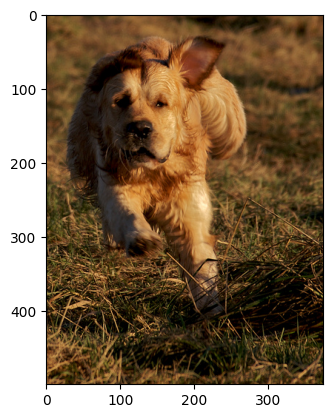

Greedy: A dog is running through the grass .


In [271]:
z+=1
pic = list(encoding_test.keys())[z]
image = encoding_test[pic].reshape((1,2048))
x=plt.imread(images+pic)
plt.imshow(x)
plt.show()
print("Greedy:",greedySearch(image))

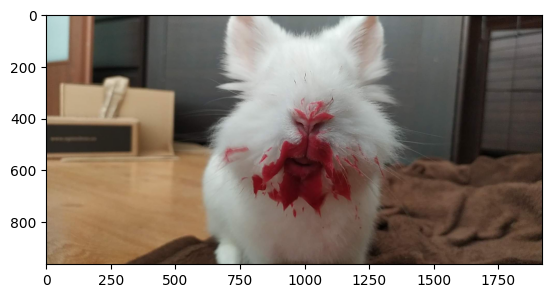

Greedy: A man in a black shirt is standing in front of a


In [232]:
pic = 'brzydal3.jpeg'
image = brzydal3.reshape((1,2048))
x=plt.imread(pic)
plt.imshow(x)
plt.show()
print("Greedy:",greedySearch(image))

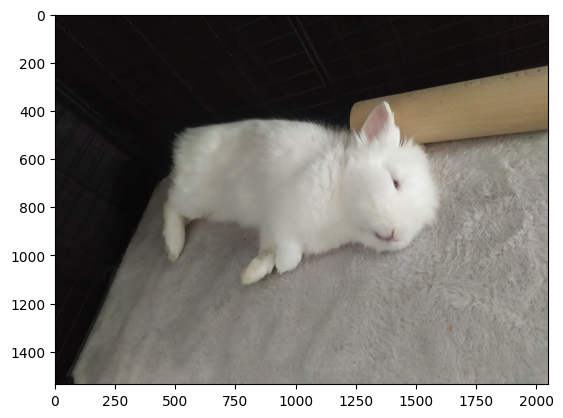

Greedy: A man is standing in front of a


In [225]:
pic = 'brzydal2.jpeg'
image = brzydal2.reshape((1,2048))
x=plt.imread(pic)
plt.imshow(x)
plt.show()
print("Greedy:",greedySearch(image))

In [209]:
brzydal = encode('brzydal.jpg')
brzydal2 = encode('brzydal2.jpeg')
brzydal3 = encode('brzydal3.jpeg')
brzydal4 = encode('brzydal4.jpeg')

1/1 [==============================] - 0s 63ms/step


In [171]:
test_descriptions = { your_key: descriptions[your_key] for your_key in test_im}

In [221]:
def evaluate_model(model, descriptions):
    actual, predicted = list(), list()
    # step over the whole set
    for key, desc_list in descriptions.items():
        # generate description
        image = encoding_test[key + '.jpg'].reshape((1,2048))
        yhat = greedySearch(image)

        # store actual and predicted
        references = [d.split() for d in desc_list[0]]
        actual.append(references)
        predicted.append(yhat.split())
    # calculate BLEU score
    print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
    print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
    print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))


In [230]:
evaluate_model(model, test_descriptions)

BLEU-1: 0.215070
BLEU-2: 0.000000
BLEU-3: 0.000000
BLEU-4: 0.000000
